<a href="https://colab.research.google.com/github/Kvaibhav1997/PIMA-Diabetes-Data/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.impute import KNNImputer
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#We replaced the zero values in the variables other than "Pregnancies" and "Outcome" with "NAN".
zero_columns = [i for i in df.columns if (df[i].min() == 0 and i not in ["Pregnancies", "Outcome"])]

for i in zero_columns:
    df[[i]] = df[[i]].replace(0, np.NaN)

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
#Solving missing value problem with KNN

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,NaN,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,NaN,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,NaN,NaN,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [11]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df = pd.DataFrame(scaler.inverse_transform(df), columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.2,238.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [12]:
#We checked again to see if there are any missing observations

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.shape

(768, 9)

In [14]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

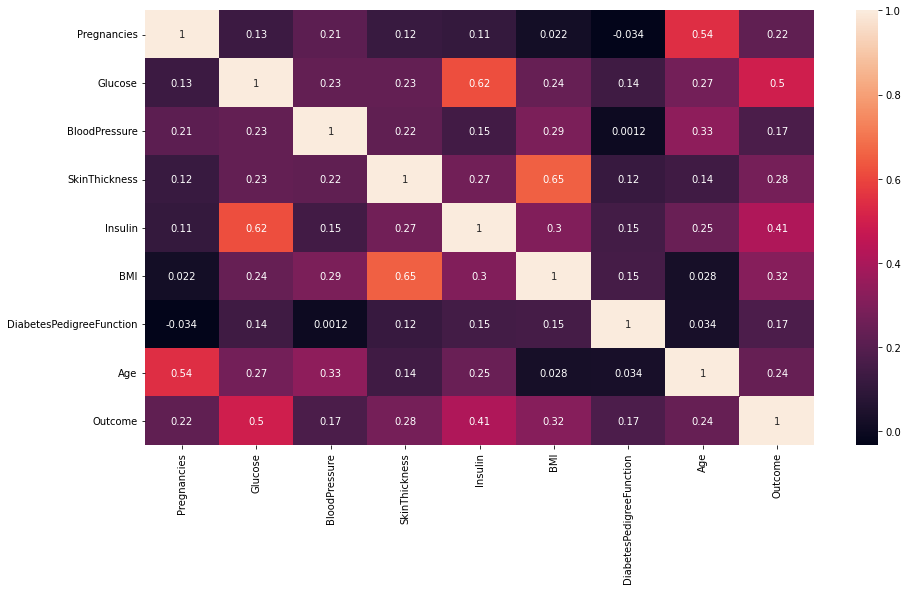

In [16]:
corr_data=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_data, annot=True)
plt.show()

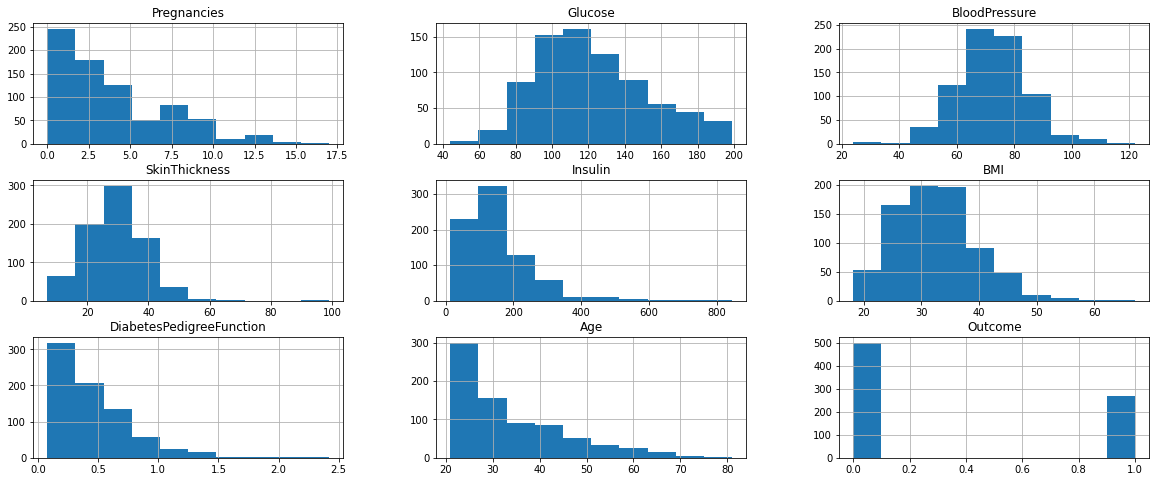

In [17]:
df.hist(figsize=(20,8))
plt.show()

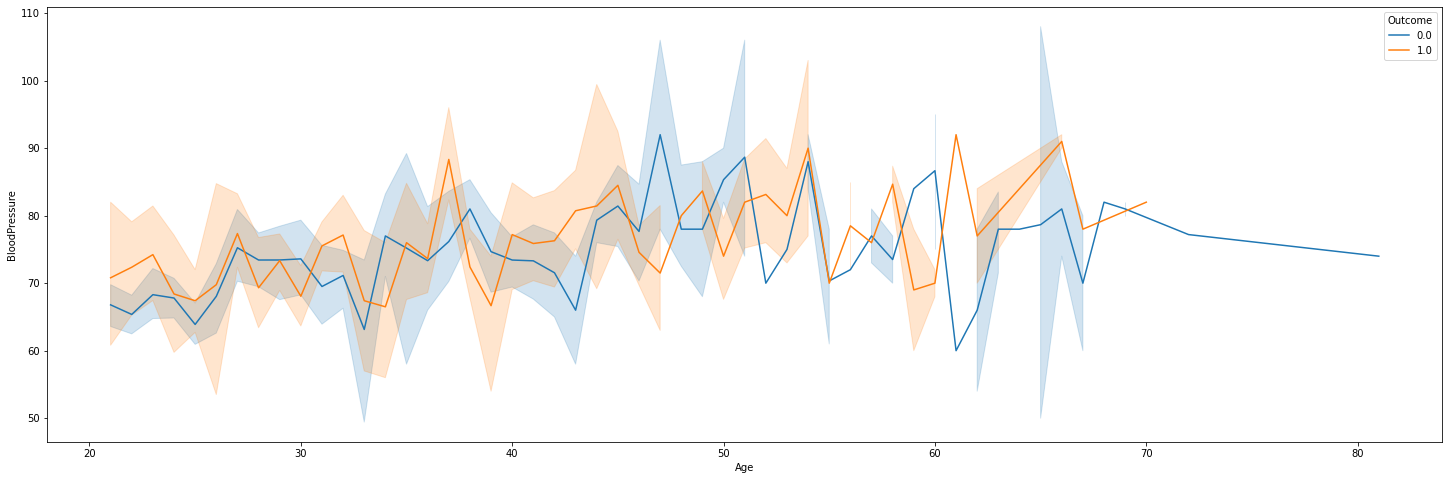

In [18]:
plt.figure(figsize=(25, 8))
sns.lineplot(y='BloodPressure', x='Age',hue='Outcome', data=df)
plt.show()


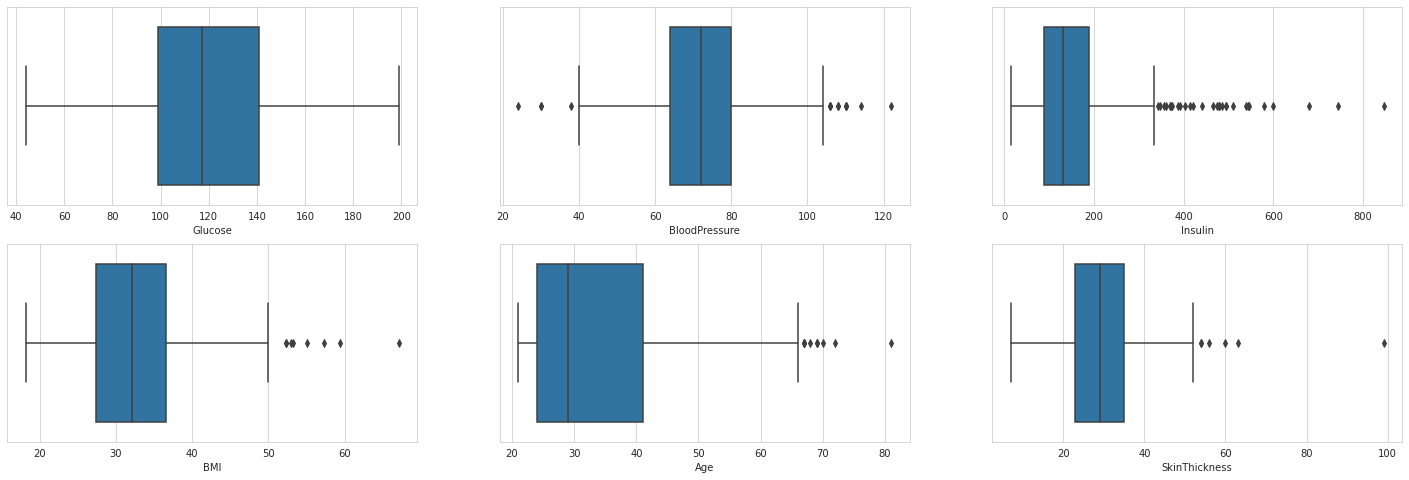

In [19]:
plt.figure(figsize=(25,8))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose', data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure', data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin', data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI', data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Age', data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness', data=df)
plt.show()

<Figure size 1800x576 with 0 Axes>

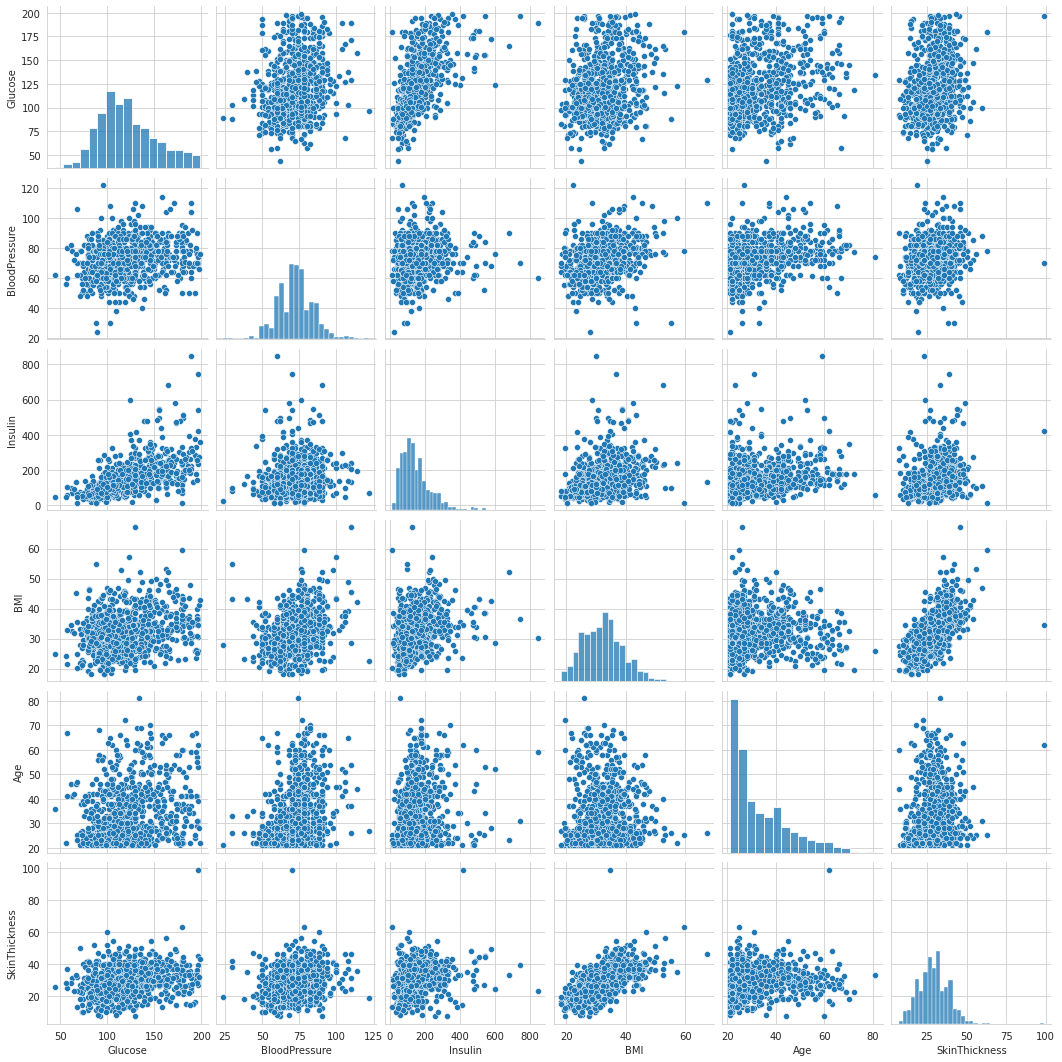

In [20]:
plt.figure(figsize=(25,8))
data1=['Glucose','BloodPressure','Insulin','BMI','Age','SkinThickness']
sns.pairplot(df[data1], palette='Accent')
plt.show()

Text(0.5, 1.0, 'Relationship between Insulin and Glucose')

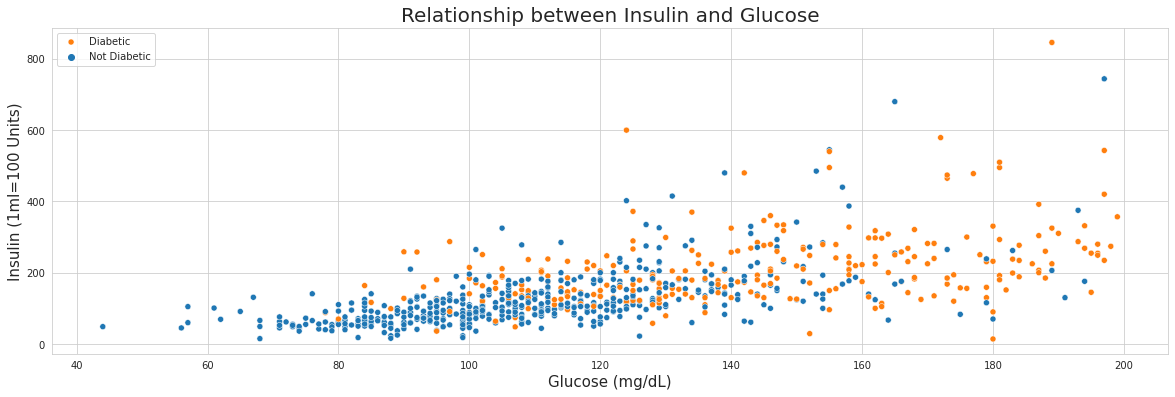

In [21]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='Glucose', y= 'Insulin',hue='Outcome', data=df)
plt.legend(['Diabetic', 'Not Diabetic'], loc ="upper left")
plt.xlabel("Glucose (mg/dL)", fontsize=15)
plt.ylabel("Insulin (1ml=100 Units)", fontsize=15)
plt.title("Relationship between Insulin and Glucose", fontsize=20)

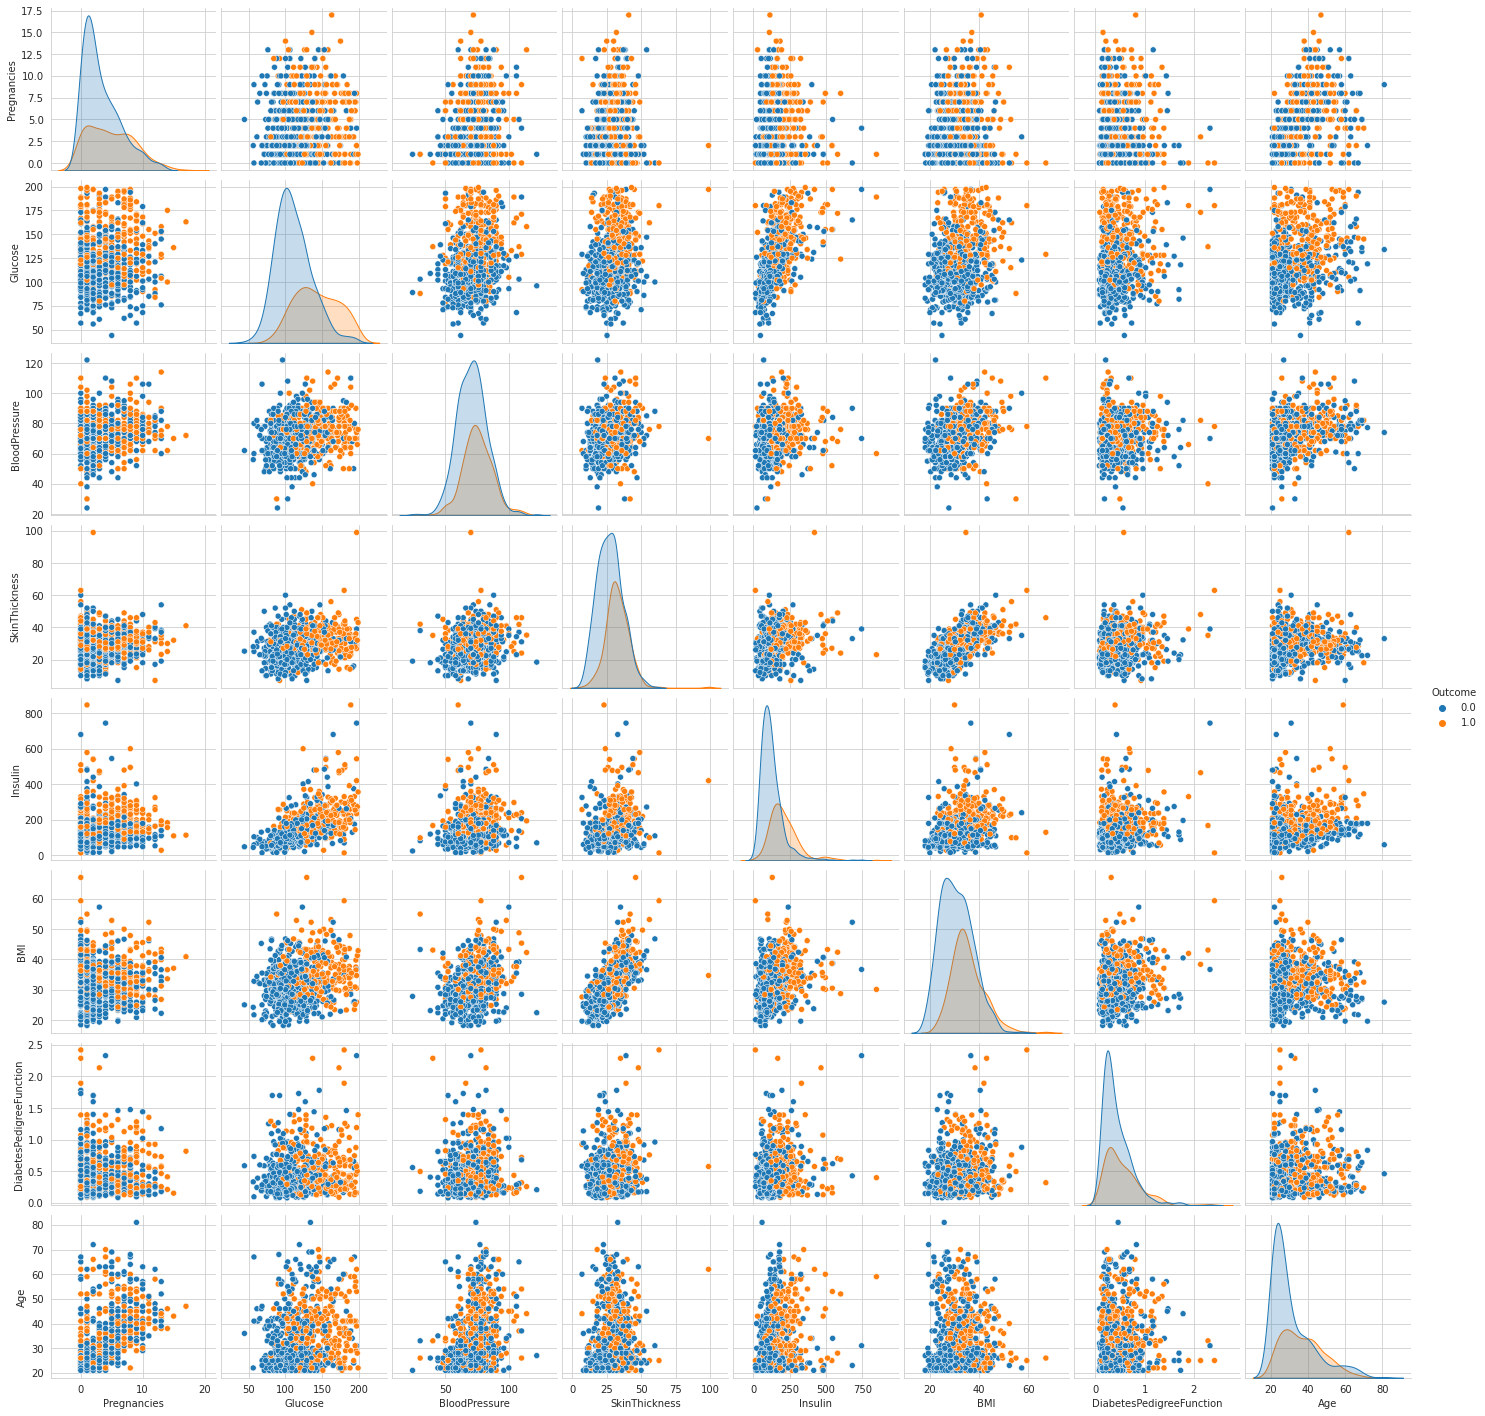

In [22]:
sns.pairplot(df,hue='Outcome')

#Training and Testing the Data

In [23]:
#train_test_splitting of the dataset
x = df.iloc[:,:8]
# Getting Predicting Value
y = df.iloc[:,-1:]

In [24]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print('The size of x train is',(x_train.shape))
print('The size of x test is',(x_test.shape))
print('The size of y train is',(y_train.shape))
print('The size of y test is',(y_test.shape))

The size of x train is (537, 8)
The size of x test is (231, 8)
The size of y train is (537, 1)
The size of y test is (231, 1)


In [25]:
scaler=MinMaxScaler()
x_data=scaler.fit_transform(x)

In [26]:
col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x_data=pd.DataFrame(x_data, columns=col)

In [27]:
x_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.384856,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.050721,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.273913,0.269231,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.163462,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.210870,0.130288,0.243354,0.115713,0.433333


#Models

###Logistic Regression

In [28]:
#LOGISTIC Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
y_pred_log=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred_log))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_log))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_log))
print("R2 score is:\n",r2_score(y_test,y_pred_log))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       147
         1.0       0.68      0.51      0.59        84

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

Confusion Matrix:
 [[127  20]
 [ 41  43]]
Training Score:
 79.3296089385475
Mean Squared Error:
 0.26406926406926406
R2 score is:
 -0.14115646258503411


In [30]:
Logistic_r=accuracy_score(y_test,y_pred_log)*100
Logistic_r

73.59307359307358

###KNeighbour Classifier

In [31]:
Range_k = range(1,20)
scores = {}
R2_scores={}
scores_list = []
R2_scores_list=[]
for k in Range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(x_train, y_train)
   y_pred = classifier.predict(x_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
   R2_scores[k] = metrics.r2_score(y_test,y_pred)
   R2_scores_list.append(metrics.r2_score(y_test,y_pred))
result1 = metrics.classification_report(y_test, y_pred)

print(result1)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79       147
         1.0       0.64      0.52      0.58        84

    accuracy                           0.72       231
   macro avg       0.70      0.68      0.68       231
weighted avg       0.71      0.72      0.71       231



-0.010204081632653184


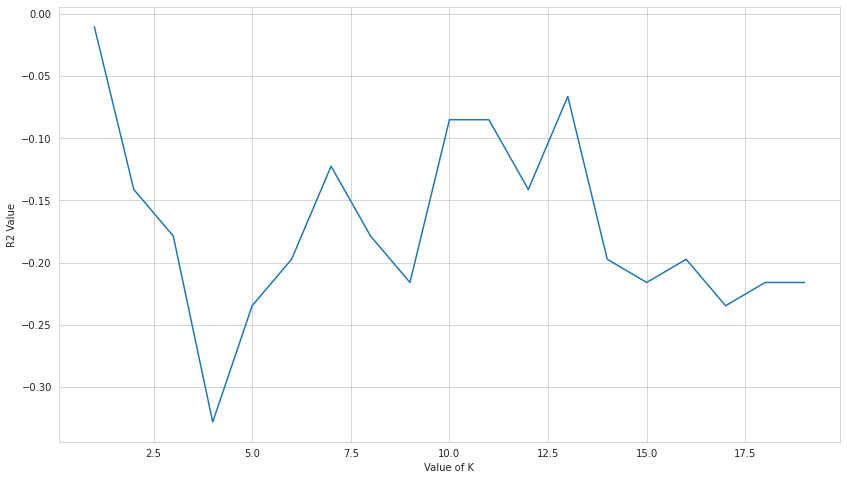

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(Range_k,R2_scores_list)
plt.xlabel("Value of K")
plt.ylabel("R2 Value")
print(max(R2_scores_list))

Text(0, 0.5, 'Accuracy')

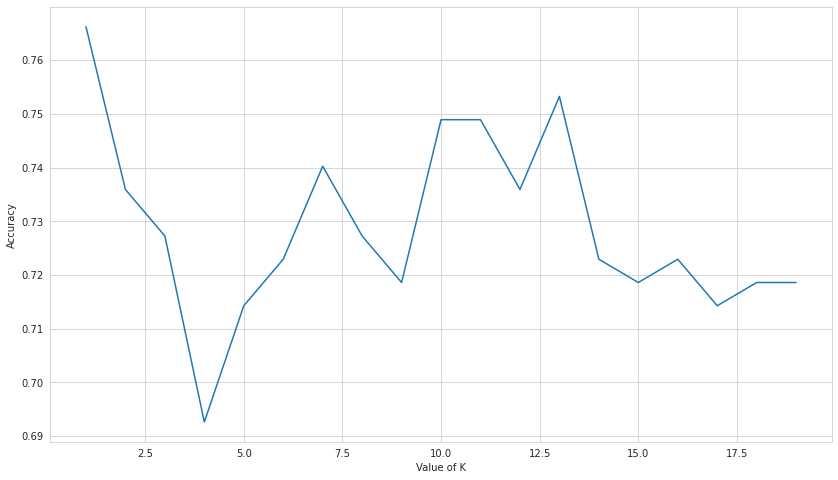

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [34]:
knn_data_acc=pd.DataFrame({"Range of K Value":[i for i in Range_k],"Accuracy":[k for k in scores_list],"R2 Score":[l for l in R2_scores_list]})
knn_data_acc.set_index('Range of K Value', inplace=True)
knn_data_acc

,Accuracy,R2 Score
Range of K Value,,
1,0.766234,-0.010204
2,0.735931,-0.141156
3,0.727273,-0.178571
4,0.692641,-0.328231
5,0.714286,-0.234694
6,0.722944,-0.197279
7,0.740260,-0.122449
8,0.727273,-0.178571
9,0.718615,-0.215986


In [35]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
knn=accuracy_score(y_test, y_pred)*100
knn

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


71.42857142857143

###Support Vector Classifier

In [36]:

svc = SVC()
svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [37]:
y_pred_svc=svc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_svc))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_svc))
print("R2 score is:\n",r2_score(y_test,y_pred_svc))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       147
         1.0       0.70      0.50      0.58        84

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

Confusion Matrix:
 [[129  18]
 [ 42  42]]
Training Score:
 77.6536312849162
Mean Squared Error:
 0.2597402597402597
R2 score is:
 -0.12244897959183687


In [38]:
svm=accuracy_score(y_test,y_pred_svc)*100
svm

74.02597402597402

###Naive Bayes Classifier

In [39]:
#Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [40]:
y_pred_nb=gnb.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_nb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_nb))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_nb))
print("R2 score is:\n",r2_score(y_test,y_pred_nb))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       147
         1.0       0.64      0.62      0.63        84

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.74      0.73       231

Confusion Matrix:
 [[118  29]
 [ 32  52]]
Training Score:
 77.28119180633148
Mean Squared Error:
 0.26406926406926406
R2 score is:
 -0.14115646258503411


In [41]:
Naive_bayes=accuracy_score(y_test, y_pred_nb)*100
Naive_bayes

73.59307359307358

###Decision Tree Classiier

In [42]:
#Decision Tree Classifier

dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [43]:
y_pred_dtc=dtree.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_dtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dtc))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_dtc))
print("R2 score is:\n",r2_score(y_test,y_pred_dtc))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.77      0.75      0.76       147
         1.0       0.58      0.62      0.60        84

    accuracy                           0.70       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231

Confusion Matrix:
 [[110  37]
 [ 32  52]]
Training Score:
 88.08193668528864
Mean Squared Error:
 0.2987012987012987
R2 score is:
 -0.2908163265306123


In [44]:
dtc=accuracy_score(y_test,y_pred_dtc)*100
dtc

70.12987012987013

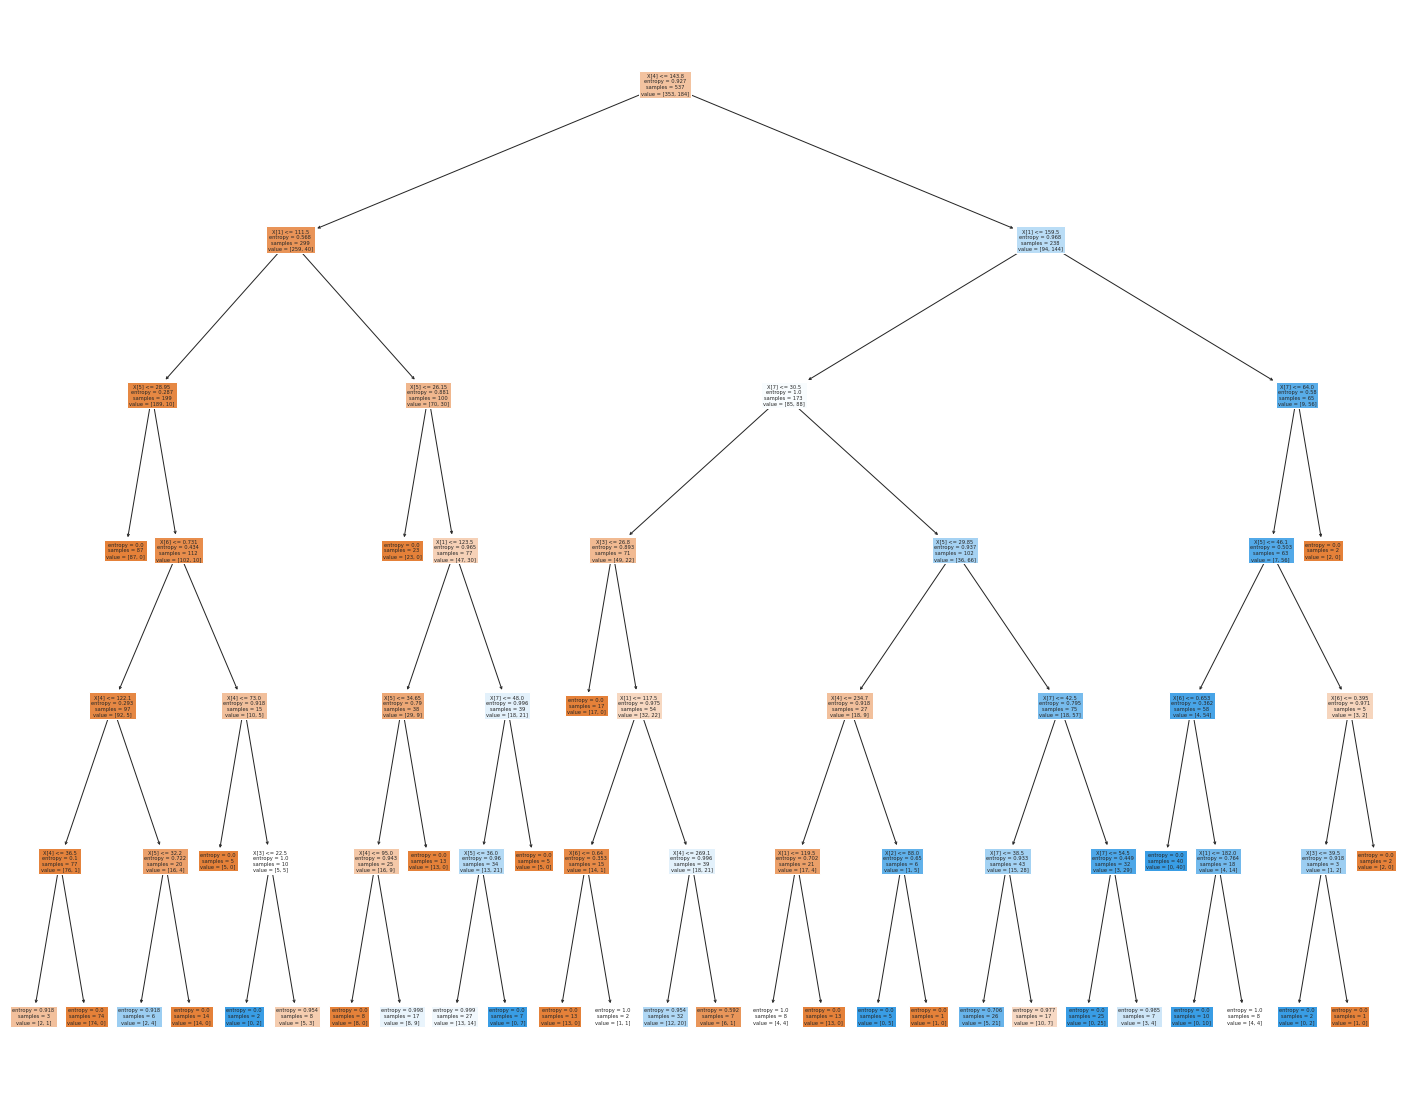

In [63]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   
                   filled=True)

In [64]:
fig.savefig("decistion_tree.png")

###Random Tree Classifier

In [45]:
#Random Forest Classifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [46]:
y_pred_rtc=rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_rtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rtc))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_rtc))
print("R2 score is:\n",r2_score(y_test,y_pred_rtc))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       147
         1.0       0.70      0.60      0.65        84

    accuracy                           0.76       231
   macro avg       0.75      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231

Confusion Matrix:
 [[126  21]
 [ 34  50]]
Training Score:
 100.0
Mean Squared Error:
 0.23809523809523808
R2 score is:
 -0.028911564625850428


In [47]:
rtc=accuracy_score(y_test,y_pred_rtc)*100
rtc

76.19047619047619

###AdaBoost Classifier

In [48]:
#AdaBoost Classifier

adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [49]:
y_pred_ab=adb.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_ab))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_ab))
print("Training Score:\n",adb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_ab))
print("R2 score is:\n",r2_score(y_test,y_pred_ab))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       147
         1.0       0.68      0.57      0.62        84

    accuracy                           0.74       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix:
 [[124  23]
 [ 36  48]]
Training Score:
 87.52327746741155
Mean Squared Error:
 0.2554112554112554
R2 score is:
 -0.1037414965986394


In [50]:
ab=accuracy_score(y_test,y_pred_ab)*100
ab

74.45887445887446

###Gradient Boosting Classifier

In [51]:
#Gradient Boosting Classifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [52]:
y_pred_gbc=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       147
         1.0       0.62      0.54      0.58        84

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

Confusion Matrix:
 [[120  27]
 [ 39  45]]
Training Score:
 96.08938547486034
Mean Squared Error:
 0.2857142857142857
R2 score is:
 -0.23469387755102034


In [53]:
gbc=accuracy_score(y_test,y_pred_gbc)*100

###XGB Classifier

In [54]:
#XGB Classifier


xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[04:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
              objective='reg:linear')

In [55]:
y_pred_xgb=xgb.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_xgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_xgb))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_xgb))
print("R2 score is:\n",r2_score(y_test,y_pred_xgb))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.81       147
         1.0       0.72      0.46      0.57        84

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.74      0.72       231

Confusion Matrix:
 [[132  15]
 [ 45  39]]
Training Score:
 91.43389199255121
Mean Squared Error:
 0.2597402597402597
R2 score is:
 -0.12244897959183687


In [56]:
xbg_accuracy=accuracy_score(y_test,y_pred_xgb)*100
xbg_accuracy

74.02597402597402

###Extra Trees Classifier

In [57]:
#Extra Trees Classifier

etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier(random_state=0)

In [58]:
y_pred_etc=etc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_etc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_etc))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_etc))
print("R2 score is:\n",r2_score(y_test,y_pred_etc))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       147
         1.0       0.71      0.56      0.63        84

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231

Confusion Matrix:
 [[128  19]
 [ 37  47]]
Training Score:
 100.0
Mean Squared Error:
 0.24242424242424243
R2 score is:
 -0.04761904761904767


In [59]:
etc=accuracy_score(y_test,y_pred_etc)*100
etc

75.75757575757575

##Model Record

In [60]:
data = {'Model Name':['Logistic Regression', 'KNeighbour Classifier', 'Support Vector Machine', 'Naive Bayes Classifier', 'Decision Tree Classifier','Random Tree Classifier','AdaBoost Classifier','Gradient Boosting Classifier', 'XGB Classifier','Extra Tree Classifier'],
        'Accuray of Models':[Logistic_r, knn, svm, Naive_bayes,dtc,rtc,ab,gbc, xbg_accuracy,etc]}
Model_record=pd.DataFrame(data)
Model_record

,Model Name,Accuray of Models
0,Logistic Regression,73.593074
1,KNeighbour Classifier,71.428571
2,Support Vector Machine,74.025974
3,Naive Bayes Classifier,73.593074
4,Decision Tree Classifier,70.129870
5,Random Tree Classifier,76.190476
6,AdaBoost Classifier,74.458874
7,Gradient Boosting Classifier,77.489177
8,XGB Classifier,74.025974
9,Extra Tree Classifier,75.757576
